In [14]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('ggplot')
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg



In [21]:
df = pd.read_csv(r'D:/well logg/premire league/EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [23]:
df.shape

(532, 18)

In [24]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [25]:
df.nunique()

Name                     524
Club                      20
Nationality               59
Position                  10
Age                       23
Matches                   38
Starts                    39
Mins                     458
Goals                     21
Assists                   13
Passes_Attempted         449
Perc_Passes_Completed    261
Penalty_Goals              9
Penalty_Attempted          8
xG                        61
xA                        37
Yellow_Cards              13
Red_Cards                  3
dtype: int64

In [26]:
df.select_dtypes(include='float').describe().T

,count,mean,std,min,25%,50%,75%,max
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
xG,532.0,0.113289,0.148174,0.0,0.01,0.06,0.150,1.16
xA,532.0,0.072650,0.090072,0.0,0.00,0.05,0.110,0.90


In [27]:
df.select_dtypes(include='int64').describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Age,532.000000,25.500000,4.319404,16.000000,22.000000,26.000000,29.000000,38.000000
Matches,532.000000,19.535714,11.840459,1.000000,9.000000,21.000000,30.000000,38.000000
Starts,532.000000,15.714286,11.921161,0.000000,4.000000,15.000000,27.000000,38.000000
Mins,532.000000,1411.443609,1043.171856,1.000000,426.000000,1345.000000,2303.500000,3420.000000
Goals,532.000000,1.853383,3.338009,0.000000,0.000000,1.000000,2.000000,23.000000
Assists,532.000000,1.287594,2.095191,0.000000,0.000000,0.000000,2.000000,14.000000
Passes_Attempted,532.000000,717.750000,631.372522,0.000000,171.500000,573.500000,1129.500000,3214.000000
Penalty_Goals,532.000000,0.191729,0.850881,0.000000,0.000000,0.000000,0.000000,9.000000
Penalty_Attempted,532.000000,0.234962,0.975818,0.000000,0.000000,0.000000,0.000000,10.000000
Yellow_Cards,532.000000,2.114662,2.269094,0.000000,0.000000,2.000000,3.000000,12.000000


In [28]:
df.select_dtypes(include='object').describe().T.style.background_gradient(cmap='PuBu')

,count,unique,top,freq
Name,532,524,Ainsley Maitland-Niles,2
Club,532,20,West Bromwich Albion,30
Nationality,532,59,ENG,192
Position,532,10,DF,178


In [29]:
df.corr()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
Age,1.000000,0.149628,0.156387,0.158643,0.047022,0.026740,0.120244,0.122812,0.084547,0.083328,-0.056098,-0.047849,0.115191,0.065414
Matches,0.149628,1.000000,0.938116,0.947351,0.441977,0.508009,0.785362,0.085462,0.227929,0.234389,0.192047,0.227570,0.578093,0.168281
Starts,0.156387,0.938116,1.000000,0.997031,0.405381,0.477704,0.853448,0.086039,0.216877,0.221418,0.072487,0.113446,0.603497,0.195383
Mins,0.158643,0.947351,0.997031,1.000000,0.400398,0.474677,0.855600,0.085460,0.219027,0.224115,0.075016,0.117602,0.604634,0.193038
Goals,0.047022,0.441977,0.405381,0.400398,1.000000,0.617831,0.201526,-0.025137,0.594730,0.590492,0.681959,0.348428,0.104413,0.057785
Assists,0.026740,0.508009,0.477704,0.474677,0.617831,1.000000,0.393906,-0.016645,0.408459,0.411784,0.383358,0.558677,0.213691,-0.020855
Passes_Attempted,0.120244,0.785362,0.853448,0.855600,0.201526,0.393906,1.000000,0.228393,0.149533,0.157020,-0.092535,0.105132,0.634567,0.208003
Perc_Passes_Completed,0.122812,0.085462,0.086039,0.085460,-0.025137,-0.016645,0.228393,1.000000,-0.024517,-0.014934,-0.035313,0.047720,0.162451,0.054068
Penalty_Goals,0.084547,0.227929,0.216877,0.219027,0.594730,0.408459,0.149533,-0.024517,1.000000,0.982176,0.407251,0.205417,0.057846,0.021109
Penalty_Attempted,0.083328,0.234389,0.221418,0.224115,0.590492,0.411784,0.157020,-0.014934,0.982176,1.000000,0.420159,0.218949,0.063506,0.031073


In [30]:
df.duplicated().sum()

0

In [31]:
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [32]:
df.loc[df.Perc_Passes_Completed==-1]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0


In [33]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [34]:
df['Name'].value_counts().nlargest(8)

Ainsley Maitland-Niles    2
Joe Willock               2
Mathew Ryan               2
Ross Barkley              2
Theo Walcott              2
Takumi Minamino           2
Robert Snodgrass          2
Ruben Loftus-Cheek        2
Name: Name, dtype: int64

In [35]:
df['Position'].replace(['FW,DF','MF,DF','FW,MF'],['DF,FW','DF,MF','MF,FW'],inplace=True)

In [36]:
print(df['Position'].unique())

['MF,FW' 'GK' 'FW' 'DF' 'MF' 'DF,FW' 'DF,MF']


In [37]:
x= df['Name'].value_counts().sort_values(ascending=False).nlargest(8).index.tolist()
print('Transfers: ',x)
for player in x:
    display(pd.DataFrame(df.loc[df.Name==player].reset_index(drop=True)))

Transfers:  ['Ainsley Maitland-Niles', 'Mathew Ryan', 'Ross Barkley', 'Theo Walcott', 'Takumi Minamino', 'Robert Snodgrass', 'Ruben Loftus-Cheek', 'Joe Willock']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ainsley Maitland-Niles,Arsenal,ENG,DF,22,11,5,490,0,0,288,78.5,0,0,0.02,0.04,0,0
1,Ainsley Maitland-Niles,West Bromwich Albion,ENG,MF,22,15,14,1230,0,0,402,76.4,0,0,0.05,0.05,2,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mathew Ryan,Arsenal,AUS,GK,28,3,3,270,0,0,67,92.5,0,0,0.0,0.0,0,0
1,Mathew Ryan,Brighton,AUS,GK,28,11,11,990,0,0,399,78.7,0,0,0.0,0.0,1,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ross Barkley,Chelsea,ENG,MF,26,2,0,42,0,0,26,84.6,0,0,0.06,0.16,0,0
1,Ross Barkley,Aston Villa,ENG,MF,26,24,18,1531,3,1,764,81.0,0,0,0.19,0.21,0,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Theo Walcott,Everton,ENG,FW,31,1,0,13,0,0,1,100.0,0,0,0.00,0.00,0,0
1,Theo Walcott,Southampton,ENG,"MF,FW",31,21,20,1618,3,3,424,72.4,0,0,0.17,0.07,0,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Takumi Minamino,Liverpool FC,JPN,"MF,FW",25,9,2,293,1,0,139,79.9,0,0,0.20,0.00,0,0
1,Takumi Minamino,Southampton,JPN,"MF,FW",25,10,9,711,2,0,257,72.4,0,0,0.15,0.07,1,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Robert Snodgrass,West Ham United,SCO,"DF,FW",32,3,0,5,0,0,3,100.0,0,0,0.00,0.00,0,0
1,Robert Snodgrass,West Bromwich Albion,SCO,"MF,FW",32,8,6,526,0,0,133,78.9,0,0,0.03,0.06,2,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0
1,Ruben Loftus-Cheek,Fulham,ENG,"MF,FW",24,30,21,1909,1,0,716,83.1,0,0,0.15,0.07,3,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Joe Willock,Arsenal,ENG,MF,20,7,2,238,0,0,91,75.8,0,0,0.17,0.02,1,0
1,Joe Willock,Newcastle United,ENG,MF,20,14,11,978,8,0,235,77.0,0,1,0.33,0.07,0,0


,Club,Goals
0,Sheffield United,19
1,Fulham,26
2,Burnley,32
3,West Bromwich Albion,33
4,Wolverhampton Wanderers,34
5,Brighton,39
6,Crystal Palace,39
7,Newcastle United,44
8,Everton,45
9,Southampton,47


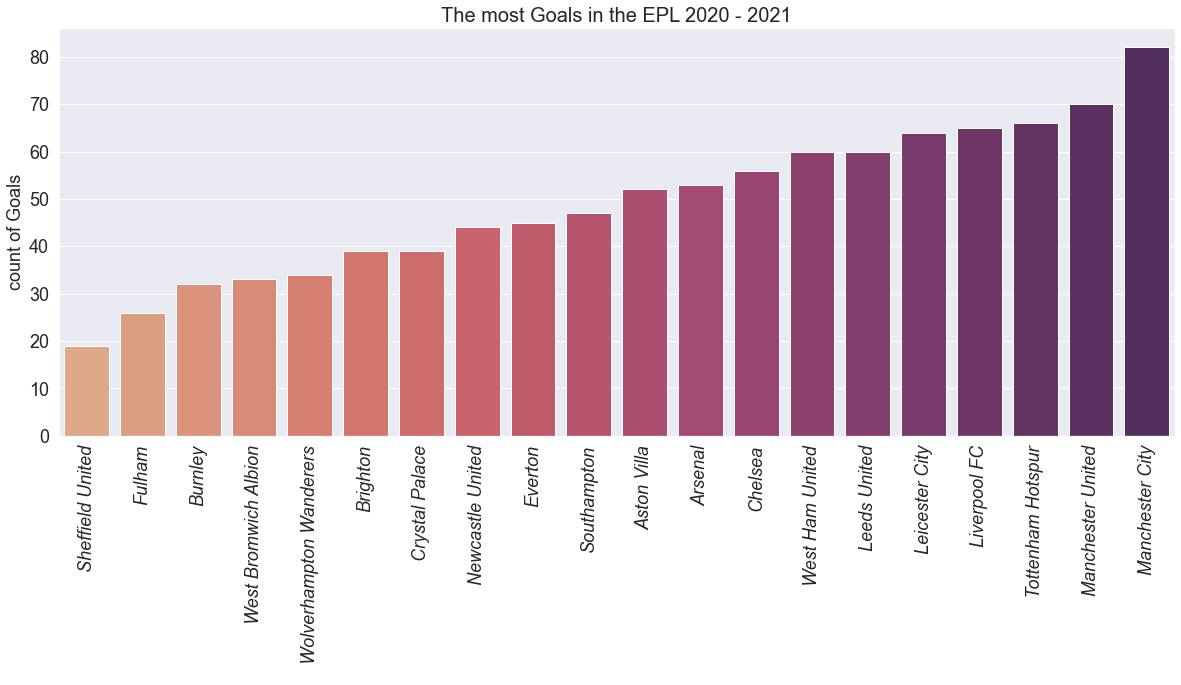

,Club,Assists
0,Sheffield United,13
1,Fulham,18
2,West Bromwich Albion,20
3,Burnley,20
4,Wolverhampton Wanderers,21
5,Brighton,24
6,Newcastle United,26
7,Crystal Palace,29
8,Everton,32
9,Southampton,33


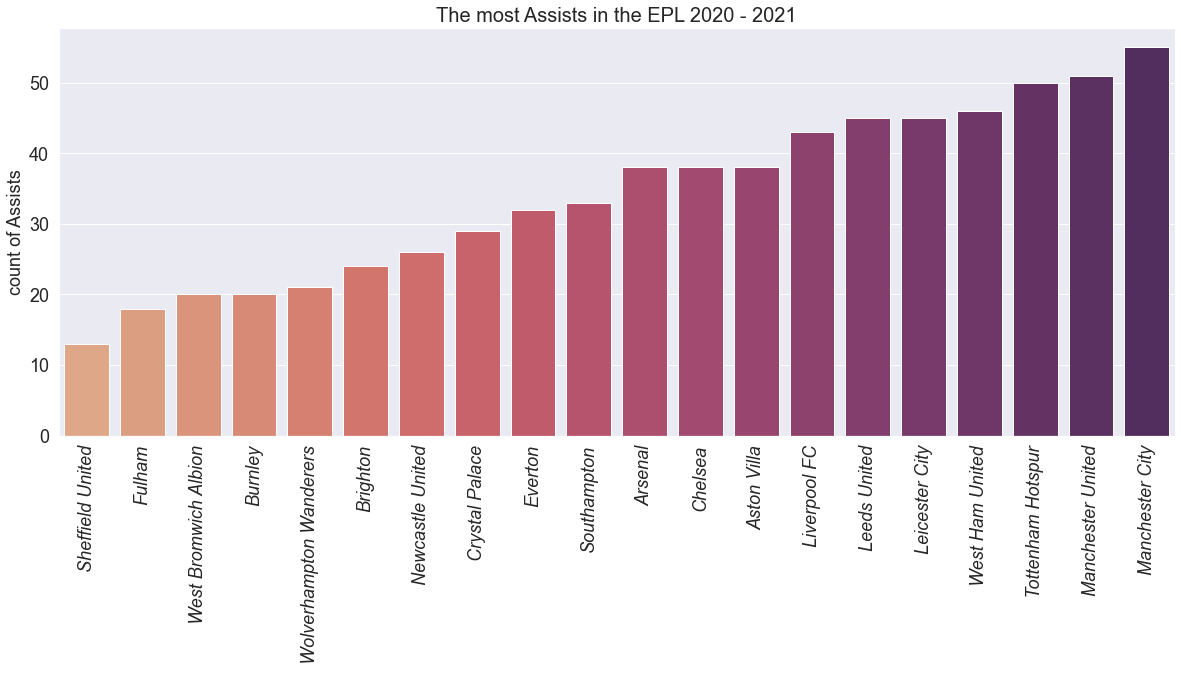

,Club,Passes_Attempted
0,West Bromwich Albion,13646
1,Newcastle United,14218
2,Burnley,15043
3,Crystal Palace,15092
4,Sheffield United,15843
5,West Ham United,16358
6,Aston Villa,16556
7,Everton,18246
8,Wolverhampton Wanderers,18661
9,Southampton,18761


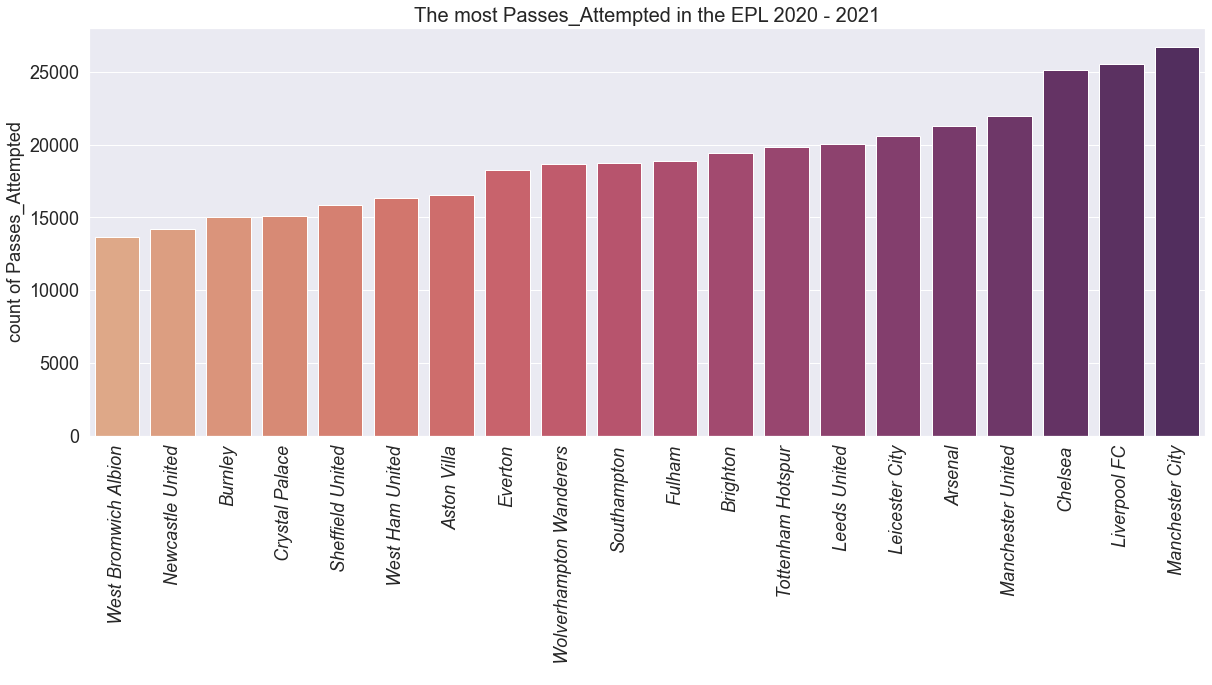

,Club,Penalty_Goals
0,West Ham United,2
1,Burnley,3
2,Crystal Palace,3
3,Fulham,3
4,Sheffield United,3
5,Wolverhampton Wanderers,4
6,West Bromwich Albion,4
7,Everton,4
8,Leeds United,4
9,Aston Villa,5


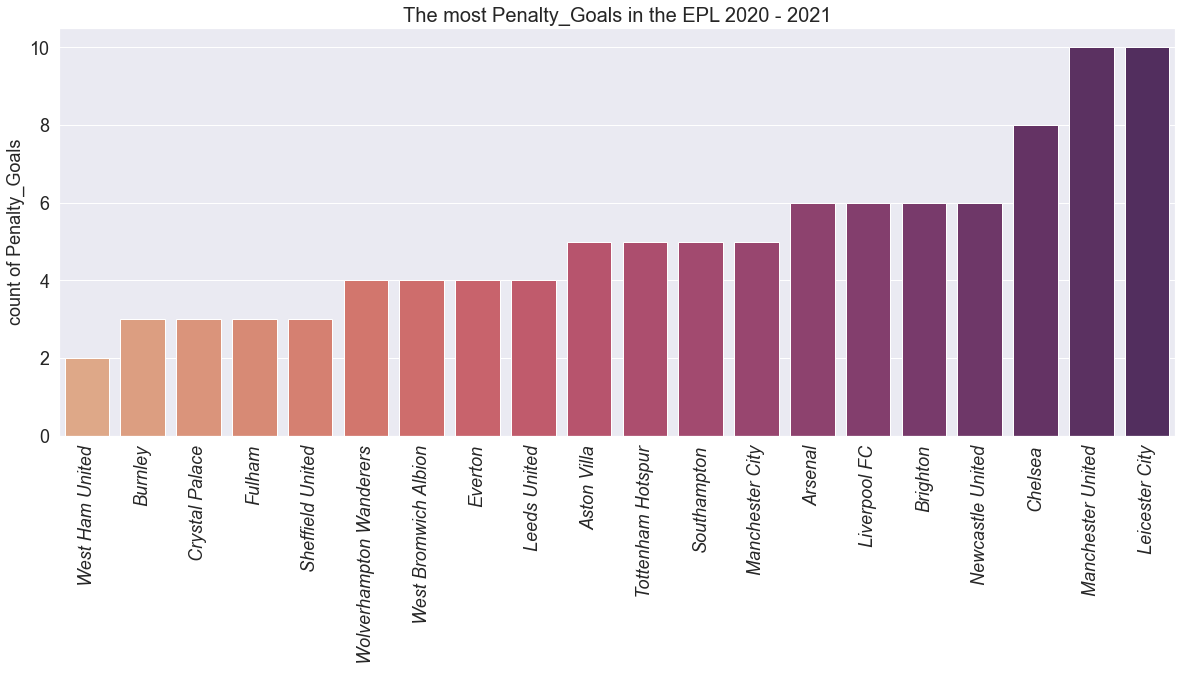

,Club,Penalty_Attempted
0,Burnley,3
1,Wolverhampton Wanderers,4
2,West Bromwich Albion,4
3,Crystal Palace,4
4,Sheffield United,4
5,Leeds United,4
6,West Ham United,4
7,Tottenham Hotspur,5
8,Everton,5
9,Southampton,6


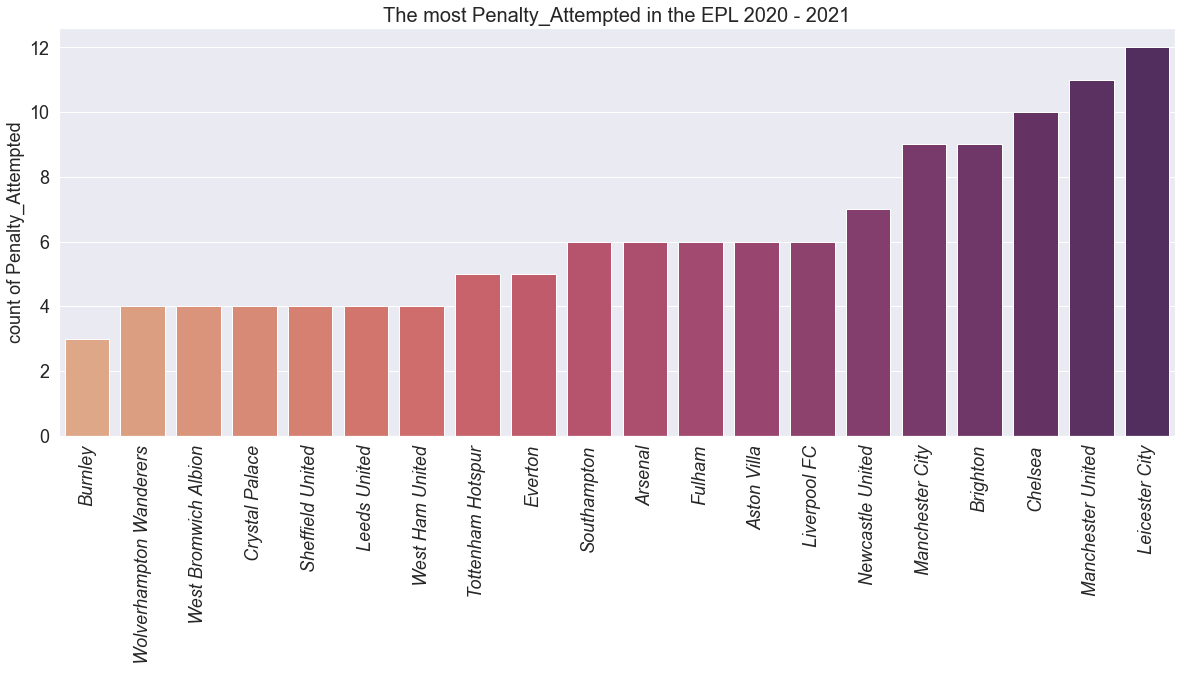

,Club,Yellow_Cards
0,Liverpool FC,40
1,Manchester City,46
2,Burnley,48
3,Arsenal,49
4,Brighton,49
5,West Ham United,50
6,West Bromwich Albion,51
7,Chelsea,51
8,Southampton,52
9,Wolverhampton Wanderers,55


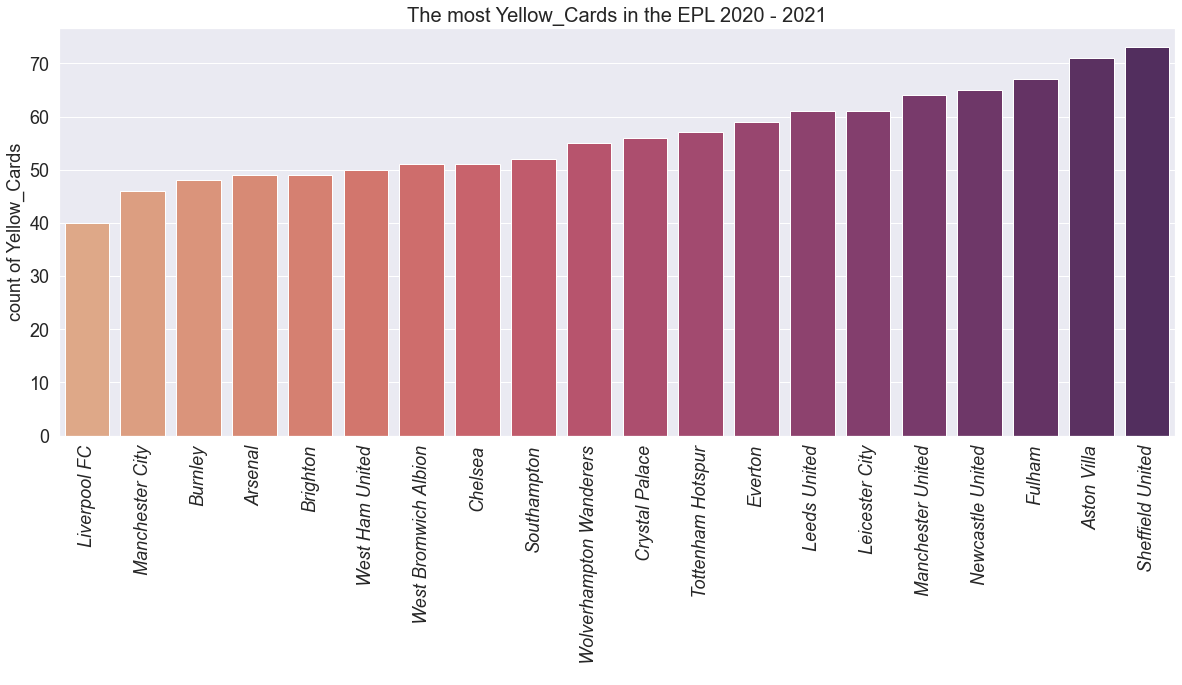

,Club,Red_Cards
0,Leicester City,0
1,Liverpool FC,0
2,Burnley,0
3,Manchester United,1
4,Leeds United,1
5,Wolverhampton Wanderers,1
6,Everton,2
7,Manchester City,2
8,Tottenham Hotspur,2
9,Crystal Palace,2


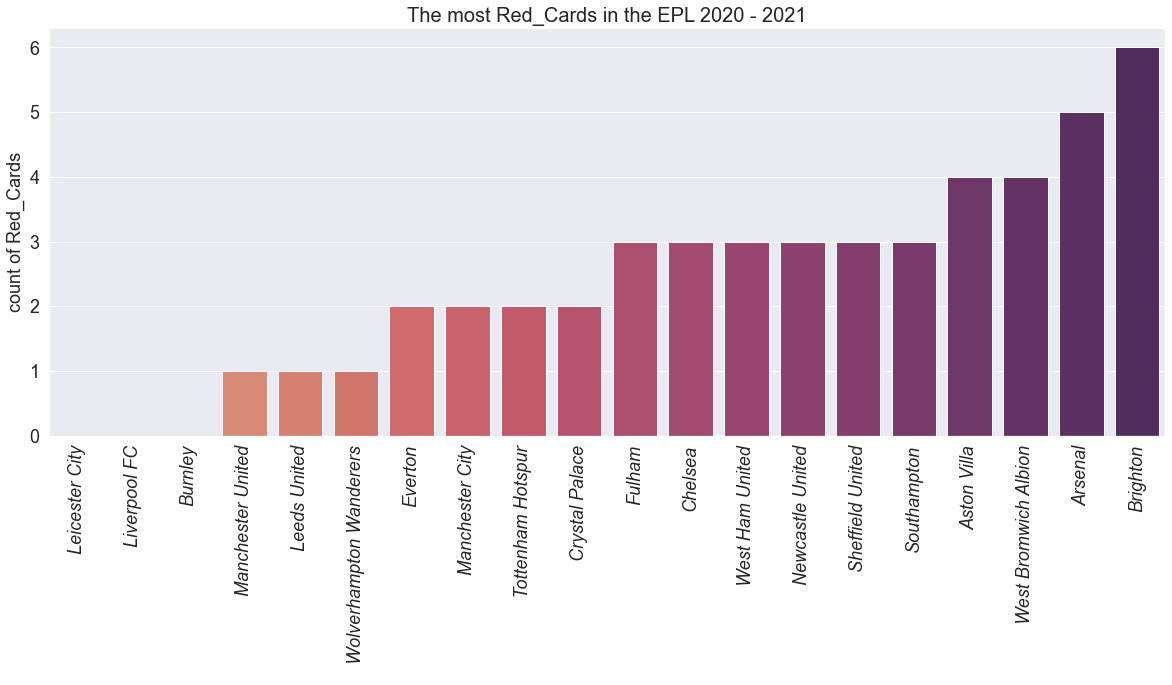

In [38]:
v = ['Goals','Assists','Passes_Attempted','Penalty_Goals','Penalty_Attempted','Yellow_Cards','Red_Cards']
for colname in v:
    x = x=pd.DataFrame(df.groupby(['Club'])[colname].sum().reset_index(drop=False).sort_values(by=colname,ascending=True).reset_index(drop=True))
    display(x.style.background_gradient( cmap='flare'))
    sns.set(rc={'figure.figsize':(20,7.5)})
    sns.barplot(x='Club',y=colname,data=x,palette="flare")
    plt.title('The most {} in the EPL 2020 - 2021'.format(colname),fontsize=20)
    plt.xlabel(' ')
    plt.ylabel('count of {}'.format(colname),fontsize=18)
    plt.xlabel(' ')
    plt.xticks(ticks=np.arange(0,20,1),labels=x['Club'],fontsize=18,style='oblique',rotation=90)
    plt.yticks(fontsize=18)
    plt.show()

,Name,Club,Goals
0,Anwar El Ghazi,Aston Villa,10
1,Matheus Pereira,West Bromwich Albion,11
2,Marcus Rashford,Manchester United,11
3,Sadio Mané,Liverpool FC,11
4,Gareth Bale,Tottenham Hotspur,11
5,Wilfried Zaha,Crystal Palace,11
6,Callum Wilson,Newcastle United,12
7,Danny Ings,Southampton,12
8,Chris Wood,Burnley,12
9,Kelechi Iheanacho,Leicester City,12


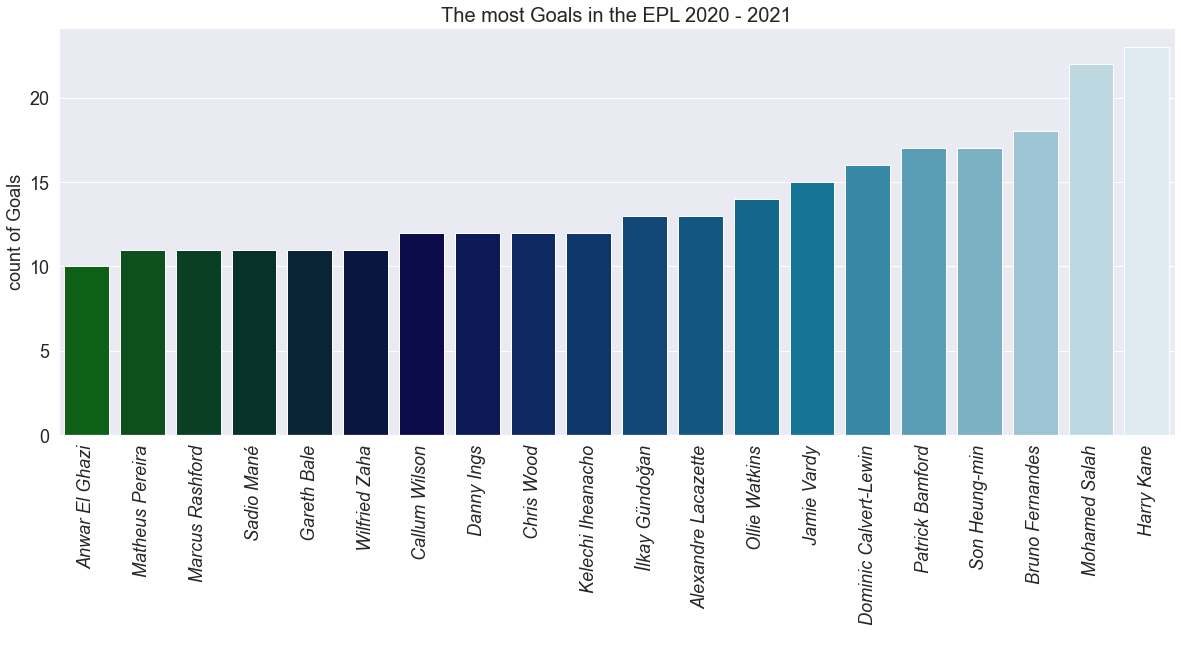

,Name,Club,Assists
0,Trent Alexander-Arnold,Liverpool FC,7
1,Roberto Firmino,Liverpool FC,7
2,Sadio Mané,Liverpool FC,7
3,Lucas Digne,Everton,7
4,Patrick Bamford,Leeds United,7
5,James Ward-Prowse,Southampton,7
6,Andrew Robertson,Liverpool FC,7
7,Raheem Sterling,Manchester City,7
8,Aaron Cresswell,West Ham United,8
9,Jack Harrison,Leeds United,8


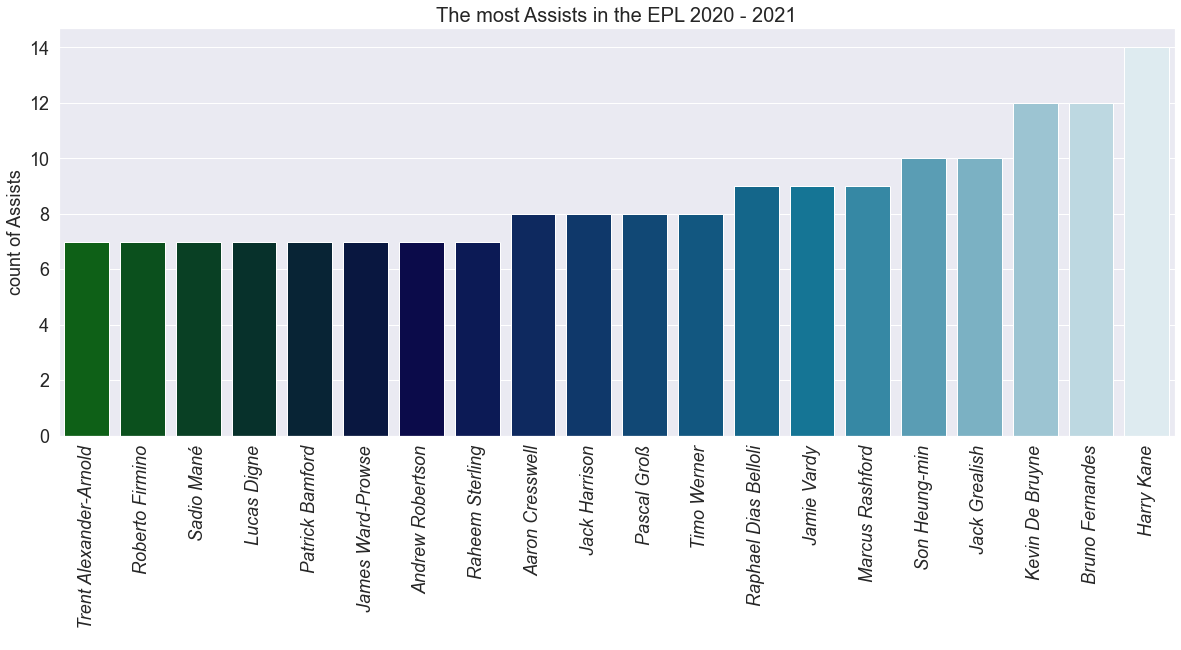

,Name,Club,Passes_Attempted
0,Luke Shaw,Manchester United,2015
1,Fabinho,Liverpool FC,2049
2,Aaron Cresswell,West Ham United,2060
3,Aaron Wan-Bissaka,Manchester United,2065
4,João Cancelo,Manchester City,2094
5,Ashley Westwood,Burnley,2125
6,Harry Maguire,Manchester United,2139
7,Matt Targett,Aston Villa,2147
8,Lewis Dunk,Brighton,2151
9,Granit Xhaka,Arsenal,2164


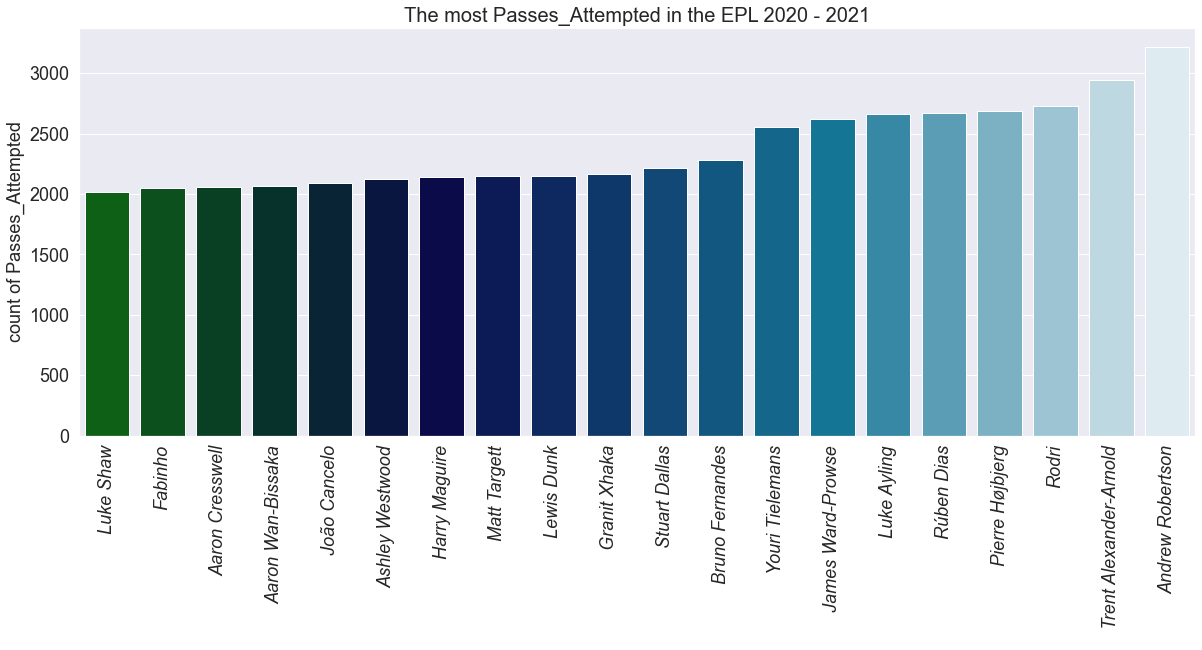

,Name,Club,Penalty_Goals
0,Patrick Bamford,Leeds United,2
1,Kevin De Bruyne,Manchester City,2
2,Pierre-Emerick Aubameyang,Arsenal,2
3,Chris Wood,Burnley,2
4,Mateusz Klich,Leeds United,2
5,Billy Sharp,Sheffield United,2
6,Pascal Groß,Brighton,3
7,James Ward-Prowse,Southampton,3
8,Rúben Neves,Wolverhampton Wanderers,3
9,Gylfi Sigurðsson,Everton,3


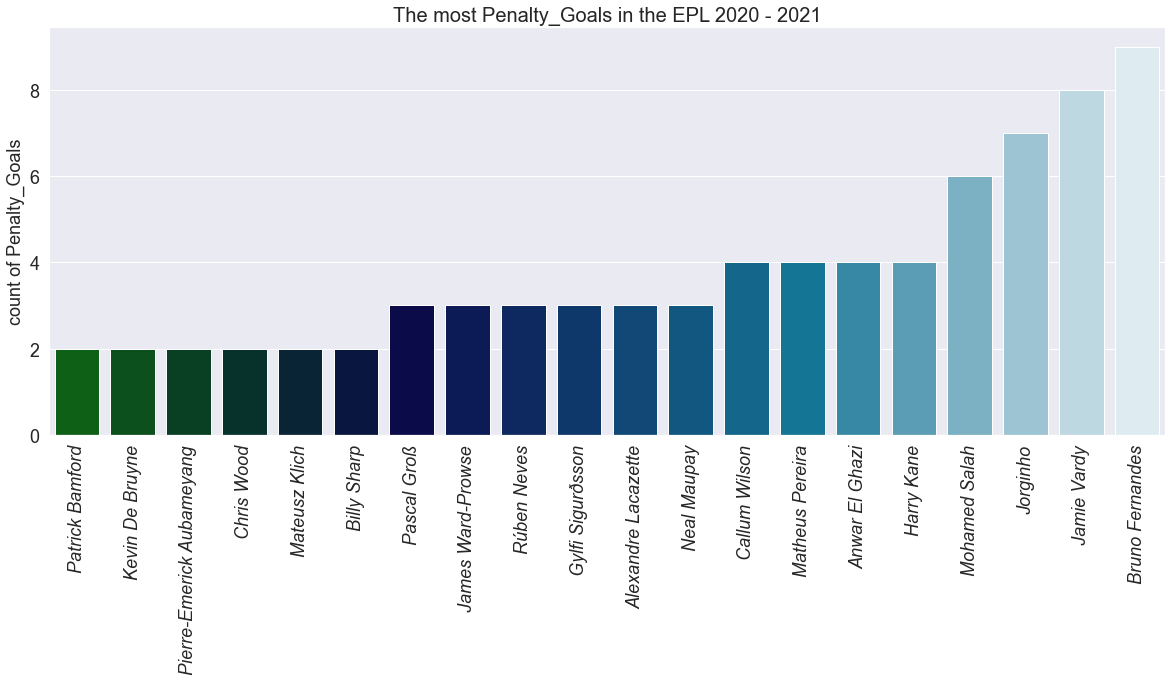

,Name,Club,Penalty_Attempted
0,Declan Rice,West Ham United,2
1,Chris Wood,Burnley,2
2,Luka Milivojević,Crystal Palace,2
3,Ollie Watkins,Aston Villa,2
4,Youri Tielemans,Leicester City,2
5,Alexandre Lacazette,Arsenal,3
6,Rúben Neves,Wolverhampton Wanderers,3
7,Kevin De Bruyne,Manchester City,3
8,Pascal Groß,Brighton,4
9,Neal Maupay,Brighton,4


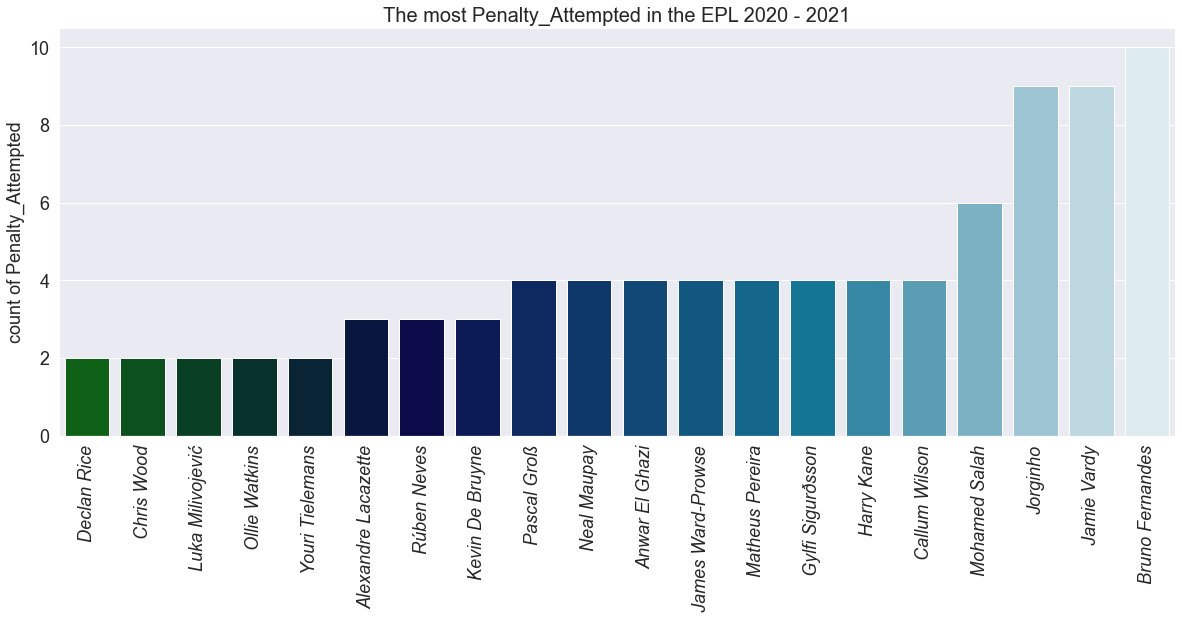

,Name,Club,Yellow_Cards
0,John Egan,Sheffield United,7
1,Joachim Andersen,Fulham,7
2,Luke Ayling,Leeds United,7
3,David McGoldrick,Sheffield United,7
4,Tomáš Souček,West Ham United,7
5,Luka Milivojević,Crystal Palace,8
6,Héctor Bellerín,Arsenal,8
7,Rúben Neves,Wolverhampton Wanderers,8
8,John Lundstram,Sheffield United,8
9,Luke Shaw,Manchester United,8


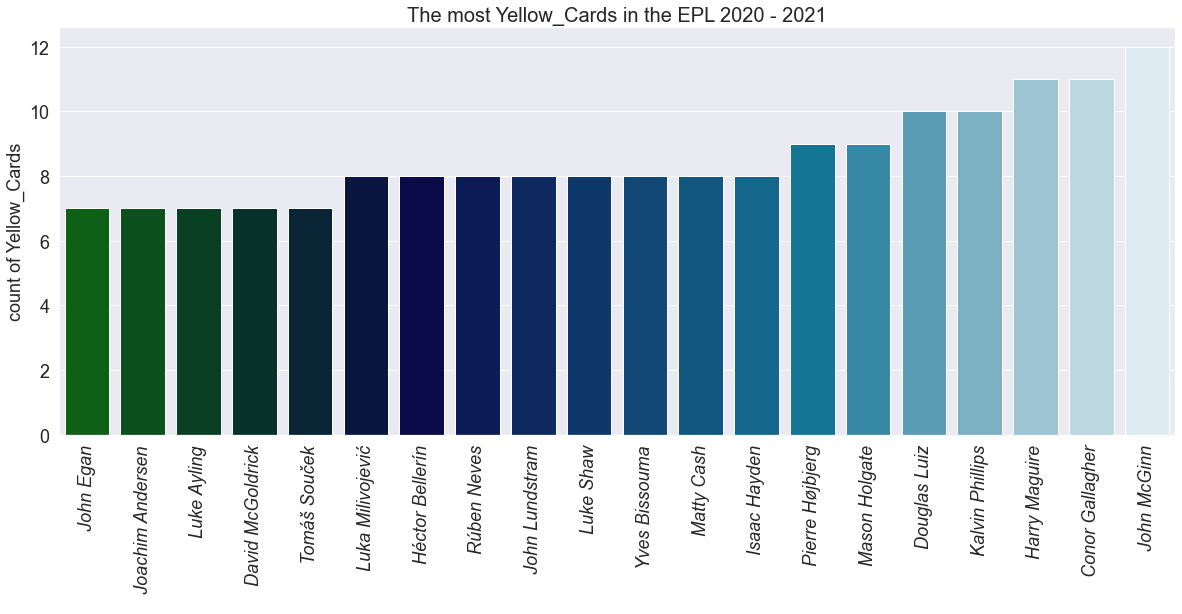

,Name,Club,Red_Cards
0,Ben White,Brighton,1
1,Tariq Lamptey,Brighton,1
2,Antonee Robinson,Fulham,1
3,Anthony Martial,Manchester United,1
4,Semi Ajayi,West Bromwich Albion,1
5,Tyrone Mings,Aston Villa,1
6,Thiago Silva,Chelsea,1
7,Richarlison,Everton,1
8,Fabián Balbuena,West Ham United,1
9,David Luiz,Arsenal,1


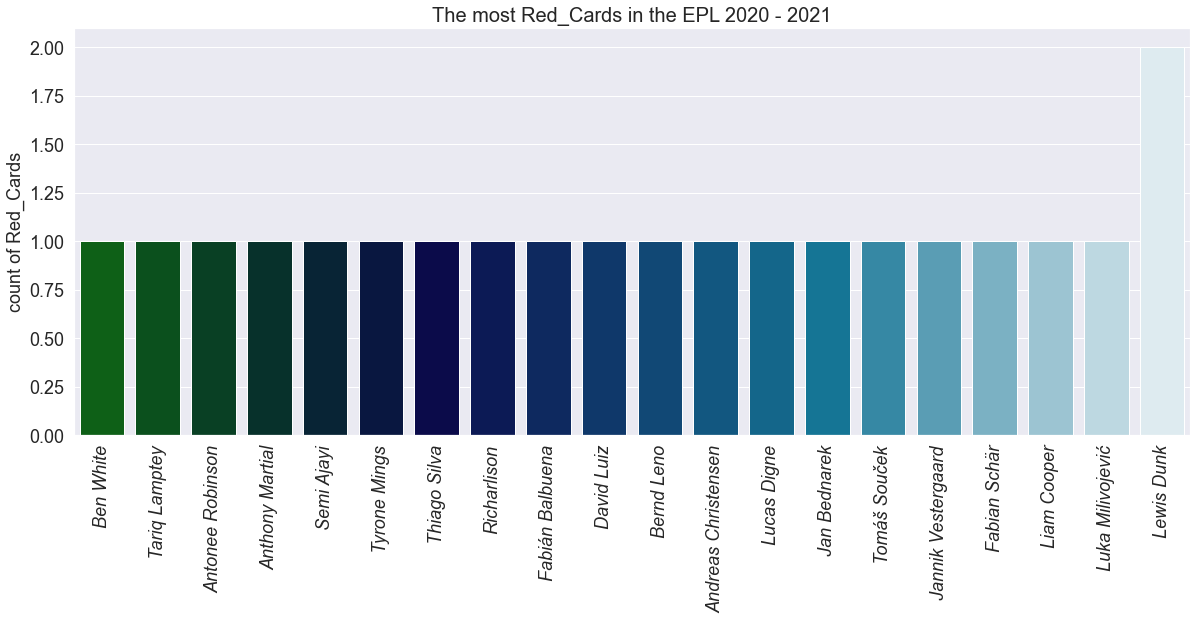

In [39]:
v = ['Goals','Assists','Passes_Attempted','Penalty_Goals','Penalty_Attempted','Yellow_Cards','Red_Cards']
for colname in v:
    x = x=pd.DataFrame(df.groupby(['Name','Club'])[colname].sum().reset_index(drop=False).sort_values(by=colname,ascending=True).tail(20).reset_index(drop=True))
    display(x.style.background_gradient( cmap='ocean'))
    sns.set(rc={'figure.figsize':(20,7.5)})
    sns.barplot(x='Name',y=colname,data=x,palette="ocean",order=x['Name'].tail(20))
    plt.title('The most {} in the EPL 2020 - 2021'.format(colname),fontsize=20)
    plt.ylabel('count of {}'.format(colname),fontsize=18)
    plt.xlabel(' ')
    plt.xticks(ticks=np.arange(0,20,1),labels=x['Name'],fontsize=18,style='oblique',rotation=90)
    plt.yticks(fontsize=18)
    plt.show()